# Student Exam Performance Report

Author: PolyTech
Date: July 2025  

In this report, we analyze real-world exam performance data using NumPy, Pandas, and Matplotlib.  
We’ll inspect trends, clean the data, and visualize student results across Math, Reading, and Writing.

## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read Data

In [70]:
df = pd.read_csv("raw_StudentsPerformance.csv")  

### View All Data

In [71]:
df

,GENDER,Race/ETHNICITY,parental level of education,lunch,test preparation course,math score,reading score,WRITINGscore
0,female,group B,bachelor's degree,standard,0,89,72,74
1,female,group C,some college,standard,COMPLETED,69,90,88
2,female,group B,master's degree,standard,NaN,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### View first 5 rows (head)


In [72]:
df.head()

,GENDER,Race/ETHNICITY,parental level of education,lunch,test preparation course,math score,reading score,WRITINGscore
0,female,group B,bachelor's degree,standard,0,89,72,74
1,female,group C,some college,standard,COMPLETED,69,90,88
2,female,group B,master's degree,standard,NaN,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### View last 5 rows (tail)

In [73]:
df.tail()

,GENDER,Race/ETHNICITY,parental level of education,lunch,test preparation course,math score,reading score,WRITINGscore
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,NaN,77,86,86


### View first n rows and last n rows


In [74]:
df.head(10)

,GENDER,Race/ETHNICITY,parental level of education,lunch,test preparation course,math score,reading score,WRITINGscore
0,female,group B,bachelor's degree,standard,0,89,72,74
1,female,group C,some college,standard,COMPLETED,69,90,88
2,female,group B,master's degree,standard,NaN,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,NaN,71,83,78
6,female,group B,some college,standard,COMPLETED,88,95,92
7,male,group B,some college,free/reduced,none,70,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,0,38,60,50


In [75]:
df.tail(10)

,GENDER,Race/ETHNICITY,parental level of education,lunch,test preparation course,math score,reading score,WRITINGscore
990,male,group E,high school,free/reduced,completed,86,81,75
991,female,group B,some high school,standard,completed,65,82,78
992,female,group D,associate's degree,free/reduced,none,55,76,76
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
994,male,group A,high school,standard,none,63,63,62
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,NaN,77,86,86


##  Inspect and Clean

In [76]:
df = pd.read_csv("raw_StudentsPerformance.csv")  

### Initial Data Inspection

In [77]:
df.info() # Display DataFrame information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   GENDER                       1000 non-null   object
 1   Race/ETHNICITY               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      996 non-null    object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   WRITINGscore                 1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [78]:
df.describe() # Display summary statistics for numerical columns

,math score,reading score,WRITINGscore
count,1000.000000,1000.000000,1000.000000
mean,66.136000,69.169000,68.054000
std,15.157218,14.600192,15.195657
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,57.750000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [79]:
df.isnull().sum() # Check for missing values in each column

GENDER                         0
Race/ETHNICITY                 0
parental level of education    0
lunch                          0
test preparation course        4
math score                     0
reading score                  0
WRITINGscore                   0
dtype: int64

###  Observations:
- The dataset contains 1,000 rows and 8 columns.
- 5 columns are of object (categorical/text) type, and 3 are int64 (numerical).
- Memory usage is approximately 62.6 KB.

### Data Quality Issues:
- Column names use inconsistent capitalization and spacing:
   e.g., GENDER, WRITINGscore, Race/ETHNICITY.
- The column test preparation course has 4 missing values.
- The values in test preparation course are inconsistent:
- Some are written as COMPLETED, completed, none, 0, and even empty/NaN.

## Clean Column Names: normalize to lowercase + snake_case

In [80]:
df = pd.read_csv("raw_StudentsPerformance.csv")  

In [81]:
df.columns = (
    df.columns
    .str.strip()              # remove leading/trailing spaces
    .str.lower()              # lowercase all
    .str.replace(" ", "_")    # replace spaces with underscores
    .str.replace("/", "_")    # optional: replace slashes too
)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      996 non-null    object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writingscore                 1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Rename inconsistent column name (WRITINGscore → writing_score)

In [82]:
df.rename(columns={'writingscore': 'writing_score'}, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      996 non-null    object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Count unique values in column, including NaN

In [83]:
df['test_preparation_course'].value_counts(dropna=False) 

test_preparation_course
none         636
completed    356
NaN            4
0              2
COMPLETED      2
Name: count, dtype: int64

### Fix inconsistent & missing values in test_preparation_course

In [84]:
df['test_preparation_course'] = (
    df['test_preparation_course']
    .astype(str)
    .str.strip()
    .str.lower()
    .replace({'0': 'none', 'nan': 'none', '': 'none'})
)
df['test_preparation_course'] = df['test_preparation_course'].fillna('none')

df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

## Export Updated Cleaned Data

In [85]:
df.to_csv("cleaned_StudentsPerformance.csv", index=False) 
df = pd.read_csv("cleaned_StudentsPerformance.csv")  
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,89,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Manipulate Data

In [86]:
df = pd.read_csv("cleaned_StudentsPerformance.csv")  

###  Add Computed Columns (Pass/Fail)

In [88]:
df = pd.read_csv("cleaned_StudentsPerformance.csv")  
df['average_score'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)
df['passed'] = df['average_score'] >= 75

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score,passed
0,female,group B,bachelor's degree,standard,none,89,72,74,78.333333,True
1,female,group C,some college,standard,completed,69,90,88,82.333333,True
2,female,group B,master's degree,standard,none,90,95,93,92.666667,True
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,False
4,male,group C,some college,standard,none,76,78,75,76.333333,True


###  Apply NumPy Operations (broadcasting, basic ops)

In [90]:
# Normalize scores out of 1 using broadcasting
df['normalized'] = df['average_score'] / 100

# Use np.where (NumPy + Pandas) for honor students
df['honor_student'] = np.where(df['average_score'] >= 90, True, False)

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score,passed,normalized,honor_student
0,female,group B,bachelor's degree,standard,none,89,72,74,78.333333,True,0.783333,False
1,female,group C,some college,standard,completed,69,90,88,82.333333,True,0.823333,False
2,female,group B,master's degree,standard,none,90,95,93,92.666667,True,0.926667,True
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,False,0.493333,False
4,male,group C,some college,standard,none,76,78,75,76.333333,True,0.763333,False


## Export Updated Final Manipulated Data

In [118]:
df.to_csv("final_StudentsPerformance.csv", index=False) 
df = pd.read_csv("final_StudentsPerformance.csv")  
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score,passed,normalized,honor_student
0,female,group B,bachelor's degree,standard,none,89,72,74,78.333333,True,0.783333,False
1,female,group C,some college,standard,completed,69,90,88,82.333333,True,0.823333,False
2,female,group B,master's degree,standard,none,90,95,93,92.666667,True,0.926667,True
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,False,0.493333,False
4,male,group C,some college,standard,none,76,78,75,76.333333,True,0.763333,False


##  Visualizations 

In [95]:
df = pd.read_csv("final_StudentsPerformance.csv")

### Line Plot 
Group by ethnicity and calculate mean average score

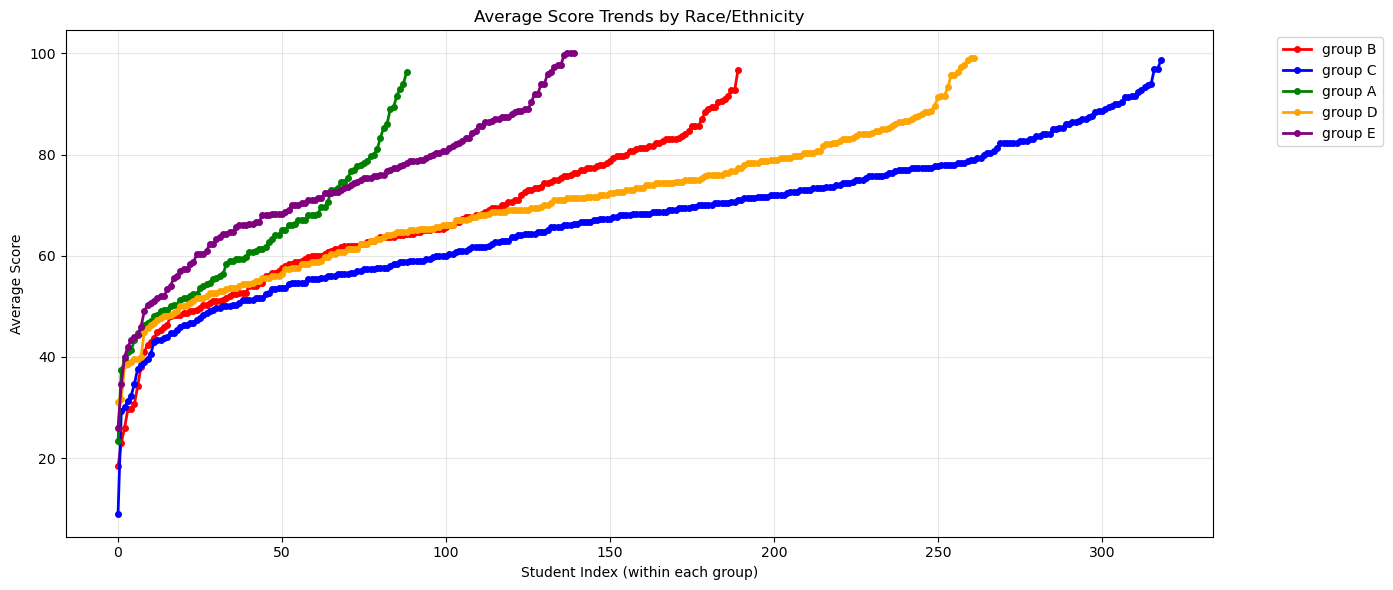

In [ ]:
plt.figure(figsize=(14, 6))
colors = ['red', 'blue', 'green', 'orange', 'purple']

for i, ethnicity in enumerate(df['race_ethnicity'].unique()):
    subset = df[df['race_ethnicity'] == ethnicity].sort_values('average_score').reset_index(drop=True)
    plt.plot(
        subset.index,
        np.minimum(subset['average_score'], 80),  # do not exceed 80
        marker='o',
        linewidth=2,
        markersize=4,
        label=ethnicity,
        color=colors[i % len(colors)]
    )

plt.title("Average Score Trends by Race/Ethnicity")
plt.xlabel("Student Index (within each group)")
plt.ylabel("Average Score")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Bar Chart
Pass rate by gender

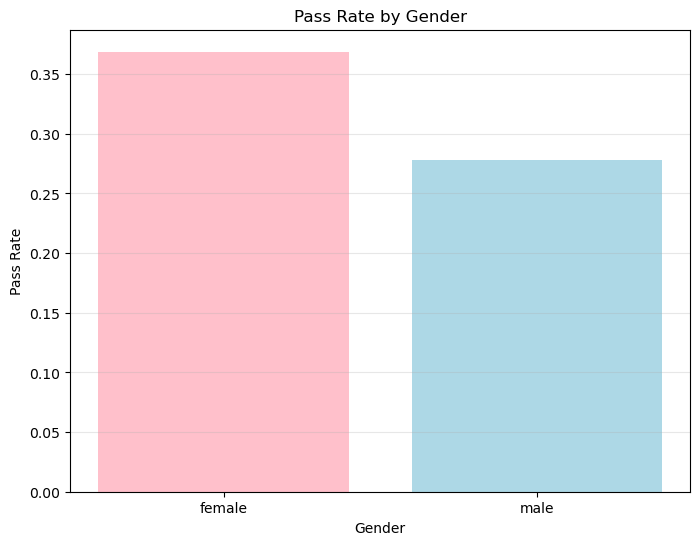

In [116]:
plt.figure(figsize=(8, 6))
pass_rate_gender = df.groupby('gender')['passed'].mean()
plt.bar(pass_rate_gender.index, pass_rate_gender.values, color=['pink', 'lightblue'])
plt.title("Pass Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Pass Rate")
plt.grid(True, alpha=0.3, axis='y')
plt.show()

### Scatter Plot
  Reading Score vs Writing Score (colored by pass status)

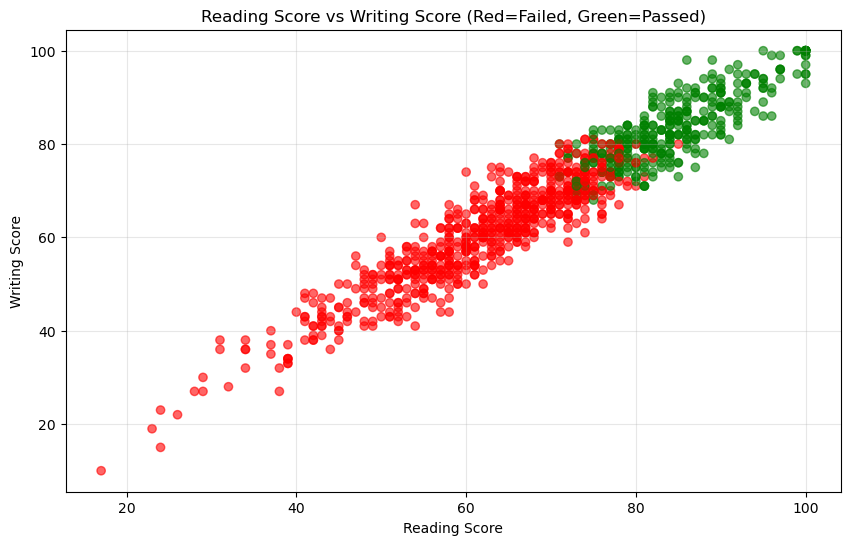

In [108]:
plt.figure(figsize=(10, 6))
colors = ['red' if x == False else 'green' for x in df['passed']]
plt.scatter(df['reading_score'], df['writing_score'], c=colors, alpha=0.6)
plt.title("Reading Score vs Writing Score (Red=Failed, Green=Passed)")
plt.xlabel("Reading Score")
plt.ylabel("Writing Score")
plt.grid(True, alpha=0.3)
plt.show()

### Histogram
by Lunch Type

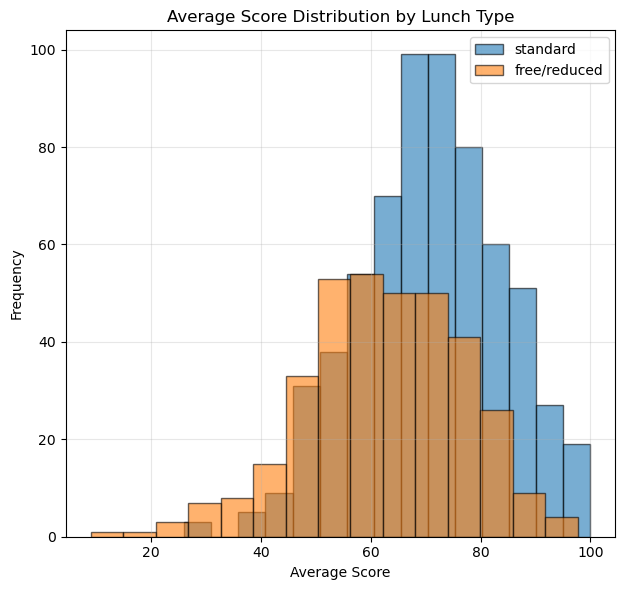

In [113]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)
for lunch in df['lunch'].unique():
    subset = df[df['lunch'] == lunch]
    plt.hist(subset['average_score'], bins=15, alpha=0.6, label=lunch, edgecolor='black')
plt.title('Average Score Distribution by Lunch Type')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()